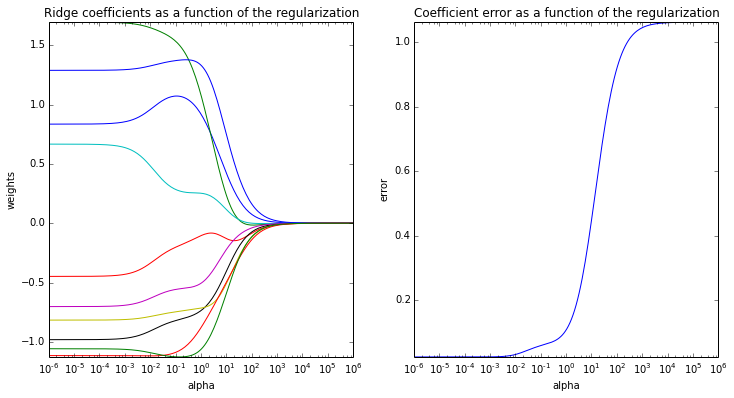

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error


def generate_test_data(N, p):
    """Generate N samples of p dimensions"""
    features = [np.random.randn(p) for x in range(N)]
    b = np.random.normal(size = p)
    e = np.random.randn() 
    e = 0
    Y = map(lambda row: sum(row * b) + e, features)

    return (b, features, Y)


clf = Ridge()

(b, features, Y) = generate_test_data(N = 10, p = 10)

coefs = []
err = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(features, Y)
    coefs.append(clf.coef_)
    err.append(mean_squared_error(clf.coef_, b))


# Display results
plt.figure(figsize=(12, 6))

plt.subplot(121)
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, err)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()